In [1]:
#load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

%matplotlib inline

### loading the data

Working with the Ecommerce Customers csv file from the company. It has Customer details such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Reading in the Ecommerce Customers csv file as a DataFrame.**

#### Assumptions

1. Linear relationship

This assumption implies that there should be linear relationship between the response variables and the predictor. Checking the linearity assumption may require plotting of predictor versus response variables.

2. Multicollinearity

We can try to remove the variables causing the multicollinearity in our dataset. If at least one of the eigen values of the correlation matrix is close to zero then we can say that multicollinearity exists in the dataset.



In [2]:
df = pd.read_csv('ecomm_customers.csv')

In [3]:
df.sample(4)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
15,jstark@anderson.com,"49558 Ramirez Road Suite 399\nPhillipstad, OH ...",Peru,30.737720,12.636606,36.213763,3.357847,461.780742
25,william25@mcconnell.com,"9495 Mary Fall Apt. 777\nGlassport, ND 17957-5596",Teal,33.029332,11.765813,37.738525,2.721736,423.179992
374,aaron89@gmail.com,"0128 Sampson Loop Suite 943\nHoffmanton, MO 02122",SaddleBrown,31.447446,10.101632,38.043453,4.238296,418.602742
353,thomas22@yahoo.com,"7346 Jennifer Green Suite 148\nWagnertown, MT ...",IndianRed,33.551651,11.936895,35.900253,4.543332,558.948112


In [4]:
df.describe(include='all')

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,garnerjustin@king.com,"3761 Jared Mountain\nNicholasport, WY 51181",GreenYellow,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.053194,12.052488,37.060445,3.533462,499.314038
std,NaN,NaN,NaN,0.992563,0.994216,1.010489,0.999278,79.314782
min,NaN,NaN,NaN,29.532429,8.508152,33.913847,0.269901,256.670582
25%,NaN,NaN,NaN,32.341822,11.388153,36.349257,2.930450,445.038277
50%,NaN,NaN,NaN,33.082008,11.983231,37.069367,3.533975,498.887875
75%,NaN,NaN,NaN,33.711985,12.753850,37.716432,4.126502,549.313828


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


### Exploratory Data Analysis

*Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?*

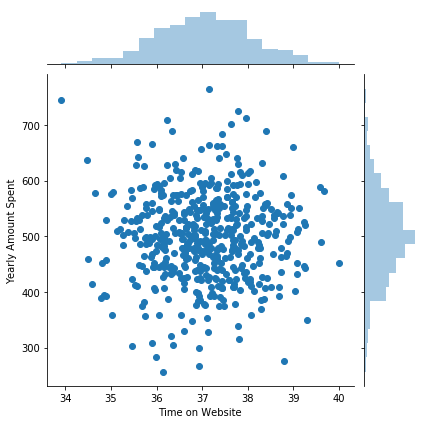

In [6]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df, kind='scatter')

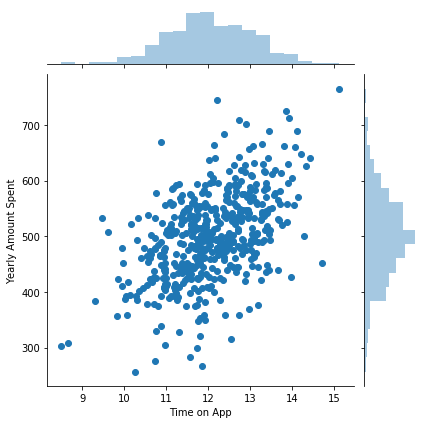

In [7]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df, kind='scatter')

** Using jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

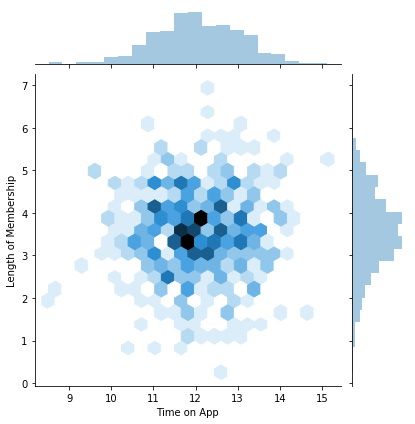

In [8]:
sns.jointplot(x='Time on App', y='Length of Membership', data=df, kind='hex')

**Let's explore these types of relationships across the entire data set. Using [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below**

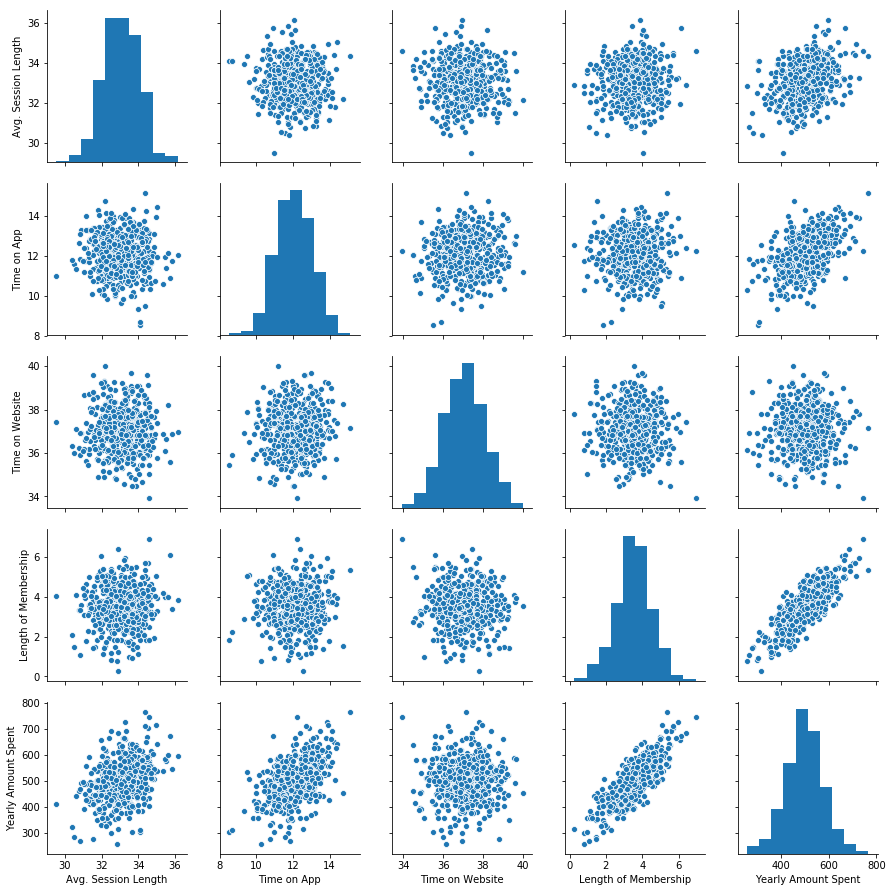

In [9]:
sns.pairplot(df)

**Creating a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

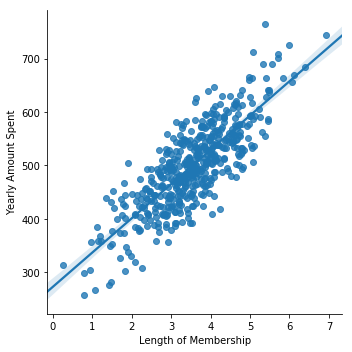

In [10]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)

### Training and Testing Data


In [11]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [12]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership' ]]

In [13]:
y = df['Yearly Amount Spent']

** Using model_selection.train_test_split from sklearn to split the data into training and testing sets. **

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [16]:
from sklearn.linear_model import LinearRegression

**Creating an instance of a LinearRegression() model named lm.**

In [17]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

** Train/fit lm on the training data.**

In [18]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Printing out the coefficients of the model**

In [19]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#### Predicting Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Using model.predict() to predict off the X_test set of the data.**

In [20]:
predictions = model.predict(X_test)
predictions[:10,]

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 ])

** Creating a scatterplot of the real test values versus the predicted values. **

Text(0,0.5,'y predicted')

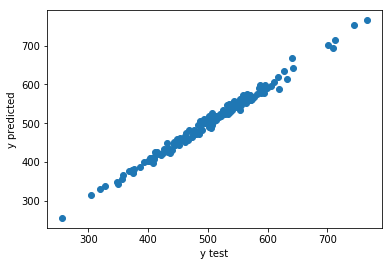

In [21]:
plt.scatter(y_test, predictions)
plt.xlabel('y test')
plt.ylabel('y predicted')

### Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. **

In [22]:
from sklearn import metrics

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 7.22814865343082
Mean Squared Error: 79.81305165097419
Root Mean Squared Error: 8.93381506697862


### Residuals

**Ploting a histogram of the residuals and making sure it looks normally distributed. **

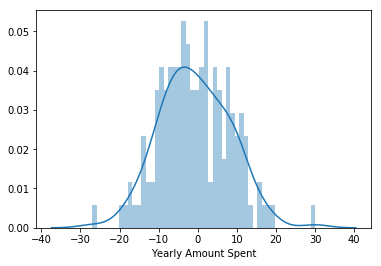

In [24]:
sns.distplot((y_test-predictions), bins=50);

### Statsmodels

In [25]:
model2 = sm.OLS(y, X)
model2

In [26]:
results = model2.fit()
results

In [27]:
results.params

Avg. Session Length     11.871334
Time on App             34.746066
Time on Website        -14.164178
Length of Membership    60.416238
dtype: float64

In [28]:
results.tvalues

Avg. Session Length     15.563921
Time on App             34.375408
Time on Website        -20.090625
Length of Membership    59.102449
dtype: float64

In [29]:
results.t_test([12,17,23,39])

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          2763.5963     39.989     69.109      0.000    2685.028    2842.165

In [30]:
results.f_test(np.identity(4))

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[61464.86436361]]), p=0.0, df_denom=496, df_num=4>